# Ridge, Lasso and Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv("auto-mpg.csv")
data = data.drop(columns = ['horsepower','car name'])
data.head()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
0,18.0,8,307.0,3504,12.0,70,1
1,15.0,8,350.0,3693,11.5,70,1
2,18.0,8,318.0,3436,11.0,70,1
3,16.0,8,304.0,3433,12.0,70,1
4,17.0,8,302.0,3449,10.5,70,1


In [3]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Train Test Split

In [4]:
X = data.drop('mpg', axis=1)
y = data[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

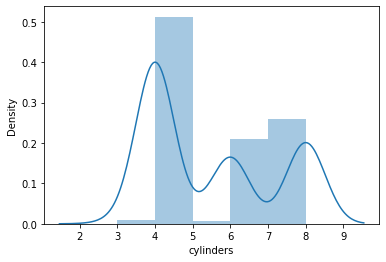

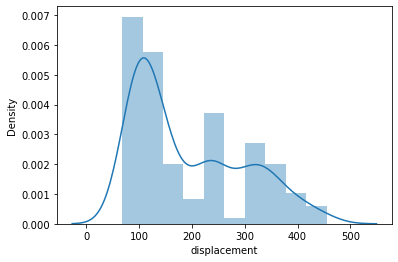

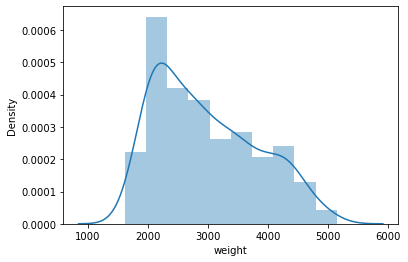

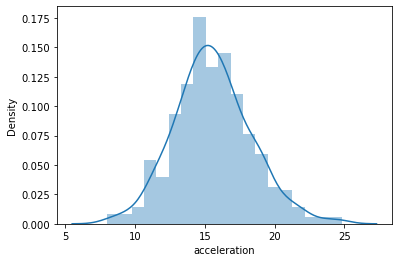

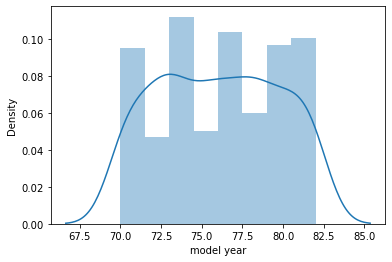

In [5]:
a=['cylinders', 'displacement', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(X[i])

# Linear Regression

In [6]:
lin_reg = LinearRegression().fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'
      .format(lin_reg.intercept_[0]))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))

linear model coeff (w): [[-0.26253955  0.01801611 -0.00694644  0.28940567  0.75783225  1.53955039]]
linear model intercept (b): -22.580
R-squared score (training): 0.819
R-squared score (test): 0.816


# Ridge Regression

In [7]:
lin_ridge = Ridge(alpha = 20.0).fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(lin_ridge.coef_))
print('linear model intercept (b): {:.3f}'
     .format(lin_ridge.intercept_[0]))
print('R-squared score (training): {:.3f}'
     .format(lin_ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_ridge.score(X_test, y_test)))

linear model coeff (w): [[-0.18625487  0.01526409 -0.00693917  0.27275931  0.75284597  1.29964352]]
linear model intercept (b): -21.469
R-squared score (training): 0.819
R-squared score (test): 0.818


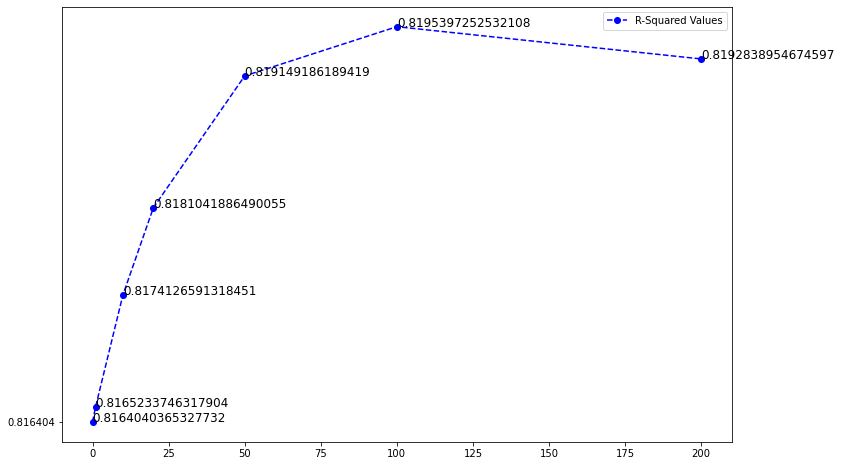

In [8]:
# Testing different alphas

alphas = [0,1,10,20,50,100,200]
testing_r_squares = []

for x in alphas:
    lin_ridge = Ridge(alpha = x).fit(X_train,y_train)
    temp = lin_ridge.score(X_test, y_test)
    testing_r_squares.append(temp)
    
    
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(alphas,testing_r_squares, '--bo', label='R-Squared Values')
for index in range(len(alphas)):
    ax.text(alphas[index], testing_r_squares[index], testing_r_squares[index], size=12)
plt.xticks(np.arange(min(alphas), max(alphas)+1, 25))
plt.yticks(np.arange(min(testing_r_squares), 1, 0.5))
plt.legend()

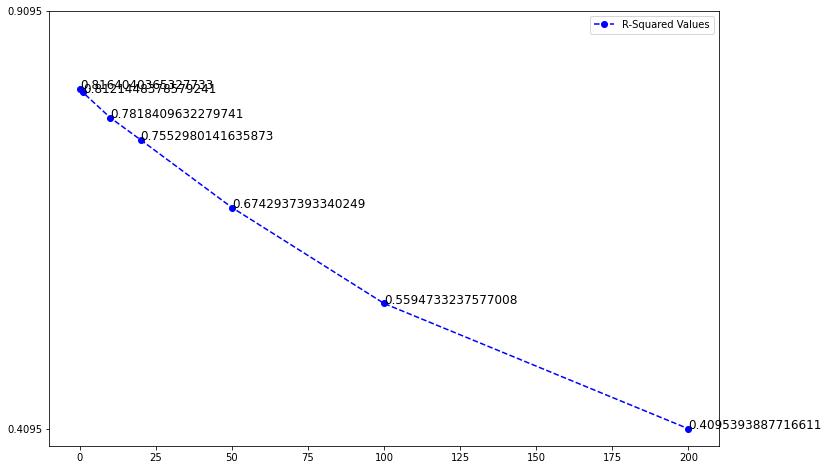

In [9]:
# Testing different alphas with feature normalization

scaler = MinMaxScaler()            # Fir the scaler using training set and then apply the same to the testing set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0,1,10,20,50,100,200]
testing_r_squares = []

for x in alphas:
    lin_ridge = Ridge(alpha = x).fit(X_train_scaled,y_train)
    temp = lin_ridge.score(X_test_scaled, y_test)
    testing_r_squares.append(temp)
    
    
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(alphas,testing_r_squares, '--bo', label='R-Squared Values')
for index in range(len(alphas)):
    ax.text(alphas[index], testing_r_squares[index], testing_r_squares[index], size=12)
plt.xticks(np.arange(min(alphas), max(alphas)+1, 25))
plt.yticks(np.arange(min(testing_r_squares), 1, 0.5))
plt.legend()

# Lasso Regression

In [10]:
scaler = MinMaxScaler()            # Fir the scaler using training set and then apply the same to the testing set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_lasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)


print('lasso regression linear model intercept: {}'
     .format(lin_lasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(lin_lasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(lin_lasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(lin_lasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(lin_lasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), lin_lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: [23.55642639]
lasso regression linear model coeff:
[-0.20758546 -0.         -0.          0.          0.          0.        ]
Non-zero features: 1
R-squared score (training): 0.014
R-squared score (test): 0.013

Features with non-zero weight (sorted by absolute magnitude):
	cylinders, -0.208


C:\Users\rauna\AppData\Local\Temp/ipykernel_9868/792710584.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lin_lasso = Lasso(alpha = x, max_iter = 10000).fit(X_train_scaled,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.628e+03, tolerance: 1.800e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

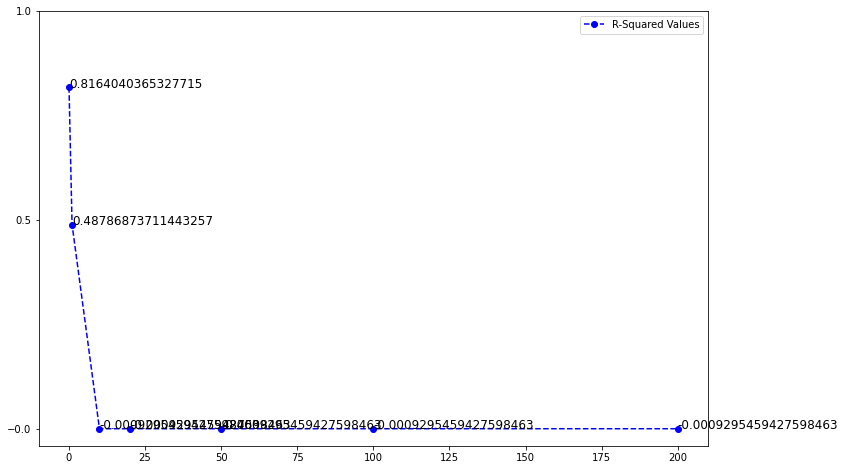

In [11]:
# Testing different alphas with feature normalization

scaler = MinMaxScaler()            # Fir the scaler using training set and then apply the same to the testing set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = [0,1,10,20,50,100,200]
testing_r_squares = []

for x in alphas:
    lin_lasso = Lasso(alpha = x, max_iter = 10000).fit(X_train_scaled,y_train)
    temp = lin_lasso.score(X_test_scaled, y_test)
    testing_r_squares.append(temp)
    
    
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(alphas,testing_r_squares, '--bo', label='R-Squared Values')
for index in range(len(alphas)):
    ax.text(alphas[index], testing_r_squares[index], testing_r_squares[index], size=12)
plt.xticks(np.arange(min(alphas), max(alphas)+1, 25))
plt.yticks(np.arange(min(testing_r_squares), 1, 0.5))
plt.legend()

# Polynomial Regression

In [12]:
# Simple Linear Regression

lin_reg = LinearRegression().fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'
      .format(lin_reg.intercept_[0]))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))

linear model coeff (w): [[-0.26253955  0.01801611 -0.00694644  0.28940567  0.75783225  1.53955039]]
linear model intercept (b): -22.580
R-squared score (training): 0.819
R-squared score (test): 0.816


In [13]:
# Quadratic Polynomial + Linear Regression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, random_state=0)

lin_reg = LinearRegression().fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(lin_reg.coef_))
print('linear model intercept (b): {:.3f}'
      .format(lin_reg.intercept_[0]))
print('R-squared score (training): {:.3f}'
     .format(lin_reg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_reg.score(X_test, y_test)))

linear model coeff (w): [[-4.09205523e-08  1.05909311e+01 -4.81363594e-01  5.94078515e-03
  -8.91366606e+00 -5.90869639e+00 -2.43710977e+01 -3.21661787e-01
  -3.00980537e-03  9.64968317e-04  3.78106639e-02 -1.26442298e-01
  -7.05750515e-02  1.16486973e-04  1.57311514e-06  5.10489394e-03
   4.27747835e-03  2.91975077e-02  3.73346524e-07 -2.68294668e-04
  -1.97679435e-04 -9.01010836e-04  9.32724293e-02  6.29190047e-02
   5.92941333e-01  3.84725118e-02  1.89306283e-01 -5.41661688e-02]]
linear model intercept (b): 322.083
R-squared score (training): 0.888
R-squared score (test): 0.874


In [14]:
# Qudaratic Polynomial + Ridge Regression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, random_state=0)

lin_ridge = Ridge(alpha = 20.0).fit(X_train,y_train)

print('linear model coeff (w): {}'
     .format(lin_ridge.coef_))
print('linear model intercept (b): {:.3f}'
     .format(lin_ridge.intercept_[0]))
print('R-squared score (training): {:.3f}'
     .format(lin_ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lin_ridge.score(X_test, y_test)))

linear model coeff (w): [[ 0.00000000e+00  3.42408276e-02  3.59983114e-03  2.30814350e-03
  -6.78342851e-01 -3.56502364e-01 -9.92255225e-02 -1.68132965e-01
  -1.44705488e-03  8.50474230e-04 -1.30903143e-02 -1.14761134e-04
  -1.35972003e-01  7.02457143e-06  7.07419207e-06  3.67842928e-03
  -1.25396978e-03  2.01259467e-02  4.91393740e-08 -3.07887759e-04
  -1.36912511e-04 -6.68034132e-04  7.30605419e-02 -2.07804621e-02
   3.29239452e-01  1.40102120e-02 -2.87473432e-02 -6.02276442e-01]]
linear model intercept (b): 15.246
R-squared score (training): 0.877
R-squared score (test): 0.859


In [15]:
# Finding best power and alpha

powers = [1,2,3]
alphas = [0,1,2,5,10,100,200]
outputs = {}

for pows in powers:
    for alph in alphas:
        
        poly = PolynomialFeatures(degree=pows)
        X_poly = poly.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_poly,y, random_state=0)
        
        lin_ridge = Ridge(alpha = alph).fit(X_train,y_train)
        
        temp1 = lin_ridge.score(X_test, y_test)
        temp2 = "Power:"+ str(pows) + " & Alpha:" + str(alph)
        outputs[temp2] = temp1

max_value = max(outputs, key=outputs.get)
print("Maximum value = ",max_value)

Maximum value =  Power:2 & Alpha:0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.01568e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.73525e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=7.49799e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.49466e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAl